In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from operator import attrgetter
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
df = pd.read_csv('../data/Dataset_ecommerce (1).csv')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


## Data Preprocessing And Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isna().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [5]:
# Dropping missing values in CustomerID
df = df.dropna(subset=["CustomerID"])

In [6]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [8]:
df["TotalPrice"] = df["UnitPrice"] * df ["Quantity"] 

In [9]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50


## Exploratory Data Analysis

#### Sales Trends Over Time

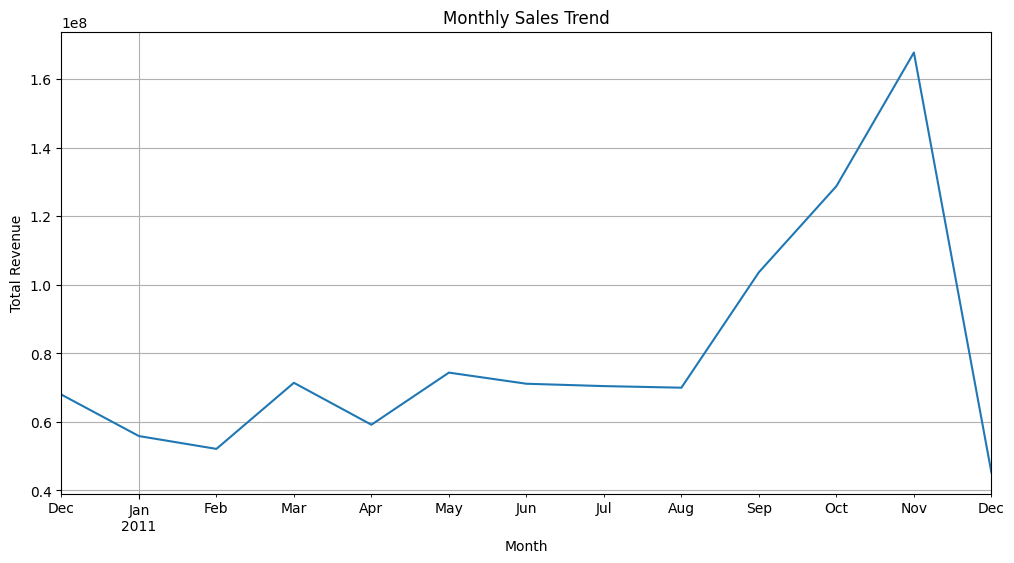

In [10]:
import os

# Sales Trends Over Time
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()

# Create folder one level up
output_dir = os.path.join(os.path.dirname(os.getcwd()), 'visualizations')
os.makedirs(output_dir, exist_ok=True)

# Plot and save
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)

# Save as PNG
output_path = os.path.join(output_dir, 'monthly_sales_trend.png')
plt.savefig(output_path)

plt.show()


### Sales Trend Observations

- **Initial Dip:** Sales declined from December to February, hitting a low in February.  
- **Moderate Recovery:** Slight growth in March and May, followed by a flat trend from June to August.  
- **Strong Growth:** Sharp increase from September to November, with November being the peak month.  
- **Sharp Drop:** Significant decline in December, likely due to seasonal closure or end of data collection.


#### Top Selling Products

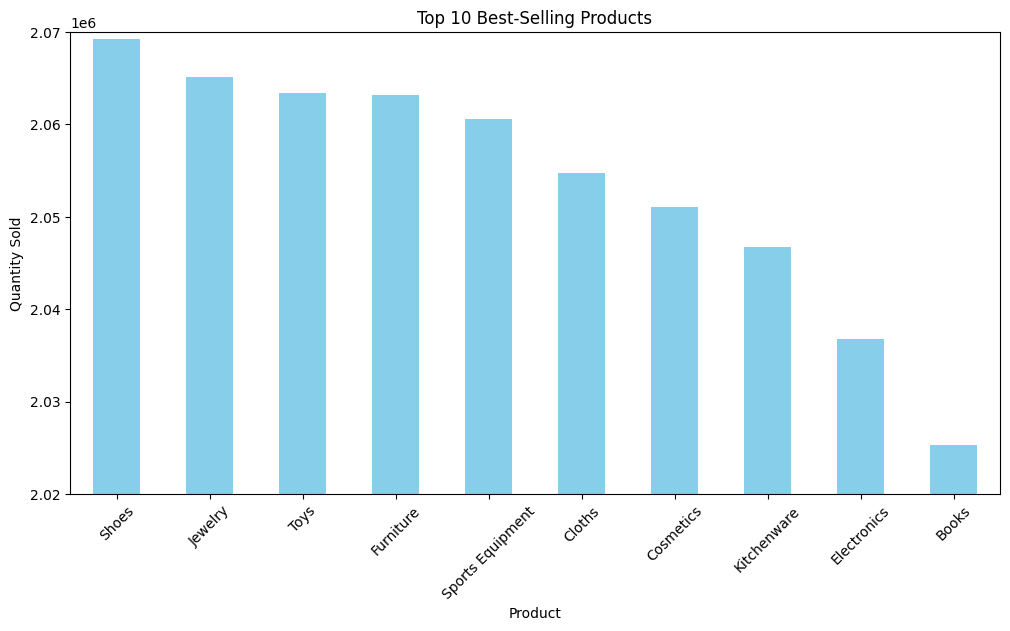

In [11]:
# Top Selling Products
# Total quantity sold per product
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Create folder one level up if it doesn't exist
output_dir = os.path.join(os.path.dirname(os.getcwd()), 'visualizations')
os.makedirs(output_dir, exist_ok=True)

# Plot
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.ylim(2.02e6, 2.07e6)

# Save the figure
output_path = os.path.join(output_dir, 'top_10_best_selling_products.png')
plt.savefig(output_path)

plt.show()

### Top 10 Best-Selling Products - Key Insights

- The bar chart displays the **Top 10 products by total quantity sold**, with all categories nearing **2 million units**.
- **Shoes** lead slightly, followed closely by **Jewelry, Toys, Furniture**, and others.
- This near-uniform performance suggests a **well-diversified product portfolio** and **balanced consumer demand**.
- Such distribution reduces reliance on a single product and reflects **effective inventory and marketing strategies**.
- This balance enhances **business resilience** and supports consistent performance across **seasonal or market shifts**.


#### Customer Activity

In [12]:
df['CustomerID'].nunique(), df['InvoiceNo'].nunique()

(4372, 22190)

In [13]:
df.groupby('CustomerID')['InvoiceNo'].nunique().max()

np.int64(248)

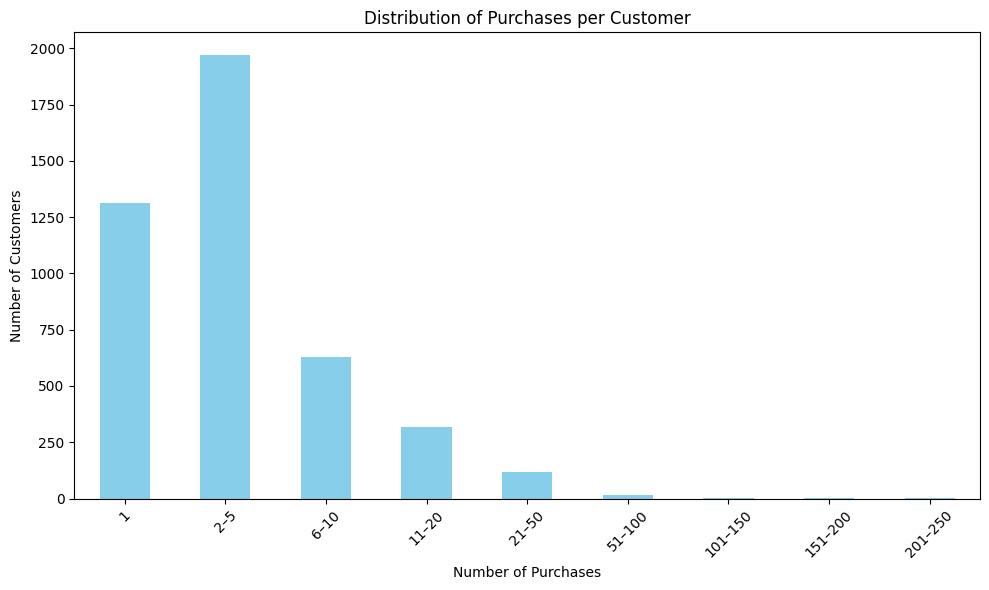

In [14]:
# Count unique purchases per customer
customer_purchases = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Create folder one level up if it doesn't exist
output_dir = os.path.join(os.path.dirname(os.getcwd()), 'visualizations')
os.makedirs(output_dir, exist_ok=True)

# Bin the number of purchases into ranges
bins = [0, 1, 5, 10, 20, 50, 100, 150, 200, 250]
labels = ['1', '2–5', '6–10', '11–20', '21–50', '51–100', '101–150', '151–200', '201–250']
binned = pd.cut(customer_purchases, bins=bins, labels=labels, include_lowest=True)

# Count number of customers in each bin
purchase_distribution = binned.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
purchase_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Distribution of Purchases per Customer')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure (after plotting)
output_path = os.path.join(output_dir, 'Distribution_of_Purchases_per_Customer.png')
plt.savefig(output_path)

# Show the plot
plt.show()



### Observations: Distribution of Purchases per Customer

- The majority of customers made **between 2–5 purchases**, followed by those who purchased only **once**.
- A **sharp drop-off** is observed after the 6–10 purchase range, with significantly fewer high-frequency buyers.
- Very few customers fall into the **51+ purchase** categories, indicating that **loyal, repeat customers are rare**.
- The distribution is **right-skewed**, suggesting that most customers are occasional buyers, while only a small fraction are highly engaged.
- This pattern highlights an opportunity to **improve customer retention and encourage repeat purchases** through targeted strategies.


## Cohort Analysis

### What is Cohort Analysis?
Cohort analysis is a way to track groups of users over time. A cohort is a group of customers who share a common starting point — for example, customers who made their first purchase in the same month.

By analyzing these groups separately, we can understand:

* How well we retain customers

* How customer behavior changes over time

* How valuable each cohort is



In [15]:
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')


#### We determine the first month a customer made a purchase (this becomes their CohortMonth).

We also extract the month of every invoice (InvoiceMonth).

This helps us calculate how many months have passed since each customer's first purchase.

In [16]:
cohorts = df.groupby(['CohortMonth', 'InvoiceMonth'])['CustomerID'].nunique().reset_index()
cohorts['CohortIndex'] = (cohorts['InvoiceMonth'] - cohorts['CohortMonth']).apply(attrgetter('n'))


#### We count how many unique customers purchased in each InvoiceMonth within each CohortMonth.

Then we calculate how many months have passed since the first purchase. This is called CohortIndex.

In [17]:
cohort_pivot = cohorts.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)


#### We pivot the table so:

* Rows = Each cohort's starting month

* Columns = How many months since they joined

* Values = Number of customers active in that month

We divide each row by its cohort size to get retention rate per month.

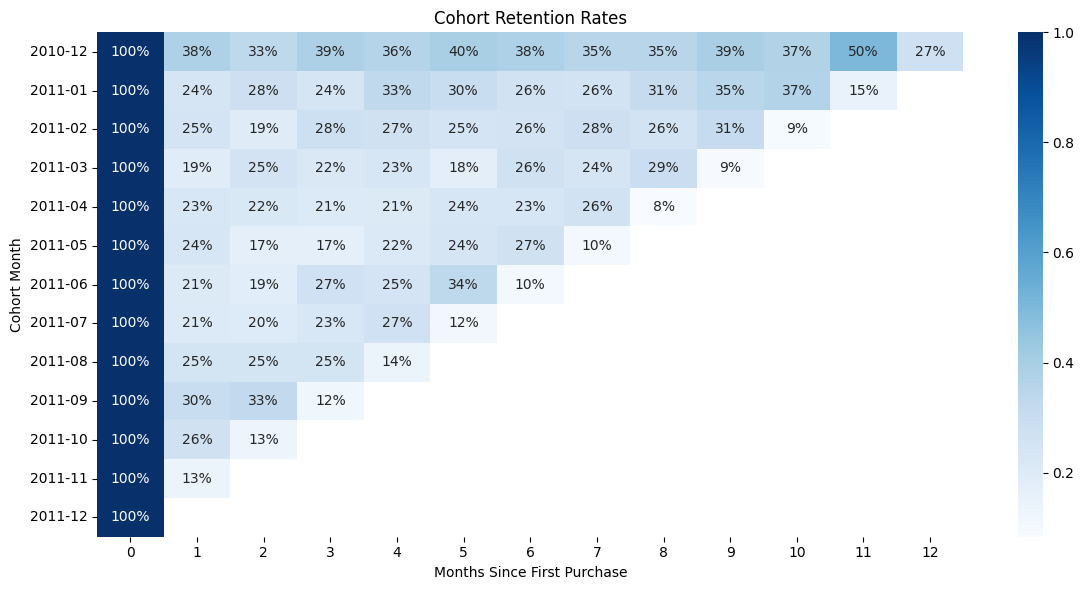

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Retention Rates')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()


## 📊 Cohort Retention Matrix – Key Insights

### 🔑 Insights:
- **Early Drop**: Most cohorts drop from 100% to 13–38% in Month 1 — strong early churn.
- **Stabilization**: Retention levels off after Month 3, indicating loyal customer base.

### 🌟 Best Cohort: 2010-12
- Retains **50% by Month 11**, ends at **27% in Month 12**.
- Suggests effective holiday acquisition or onboarding.

### 📉 Weak Cohorts:
- **2011-11**: Only 13% in Month 1.
- **2011-04**: Falls to 8% by Month 7 — fast drop-off.

### 📌 Takeaways:
- Replicate 2010-12 strategies.
- Improve onboarding to reduce Month 1 churn.
- Audit acquisition sources for low-retention cohorts.

## Cohort Lifetime Value (CLV)

In [19]:
cohort_revenue = df.groupby(['CohortMonth', 'InvoiceMonth'])['TotalPrice'].sum().reset_index()
cohort_revenue['CohortIndex'] = (cohort_revenue['InvoiceMonth'] - cohort_revenue['CohortMonth']).apply(attrgetter('n'))
cohort_cumrev = cohort_revenue.pivot(index='CohortMonth', columns='CohortIndex', values='TotalPrice').cumsum(axis=1)


#### We calculate total revenue per cohort per month.

Then we compute the cumulative revenue for each cohort (aka cohort CLV).

The plot shows how valuable each cohort becomes over time.



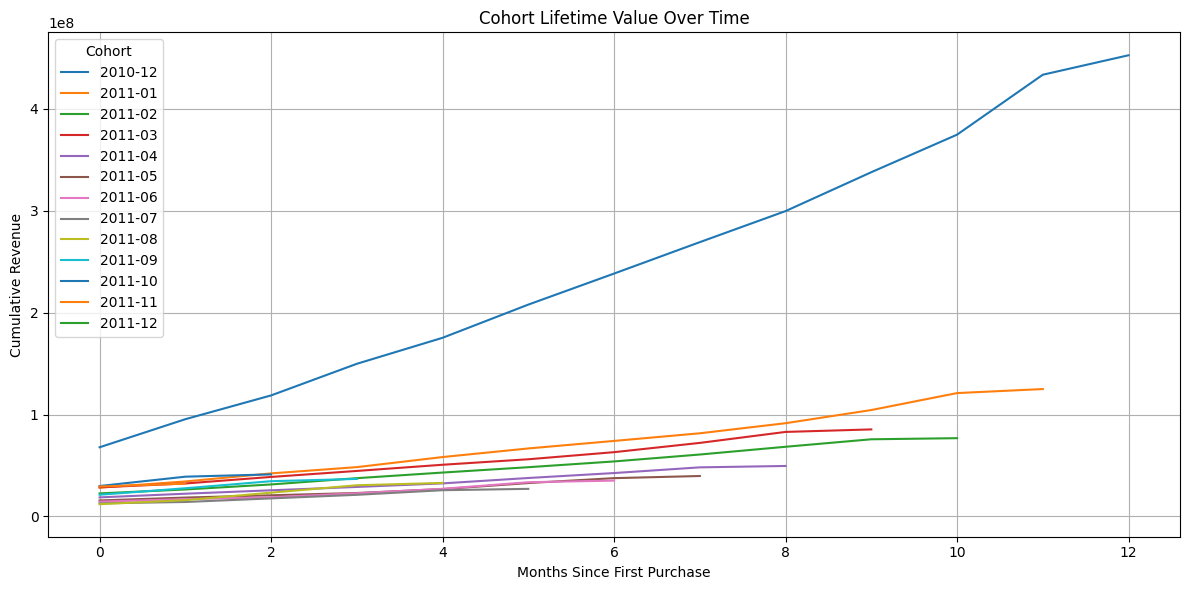

In [20]:
plt.figure(figsize=(12,6))
for cohort in cohort_cumrev.index:
    plt.plot(cohort_cumrev.columns, cohort_cumrev.loc[cohort], label=str(cohort))
plt.title('Cohort Lifetime Value Over Time')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cumulative Revenue')
plt.legend(title='Cohort')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
cust_purchases = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cust_purchases['Repeat'] = cust_purchases['InvoiceNo'] > 1

repeat_customers = df[['CustomerID', 'CohortMonth']].drop_duplicates().merge(cust_purchases, on='CustomerID')
repeat_rate = repeat_customers.groupby('CohortMonth')['Repeat'].mean() * 100


## Repeat Purchase Rate

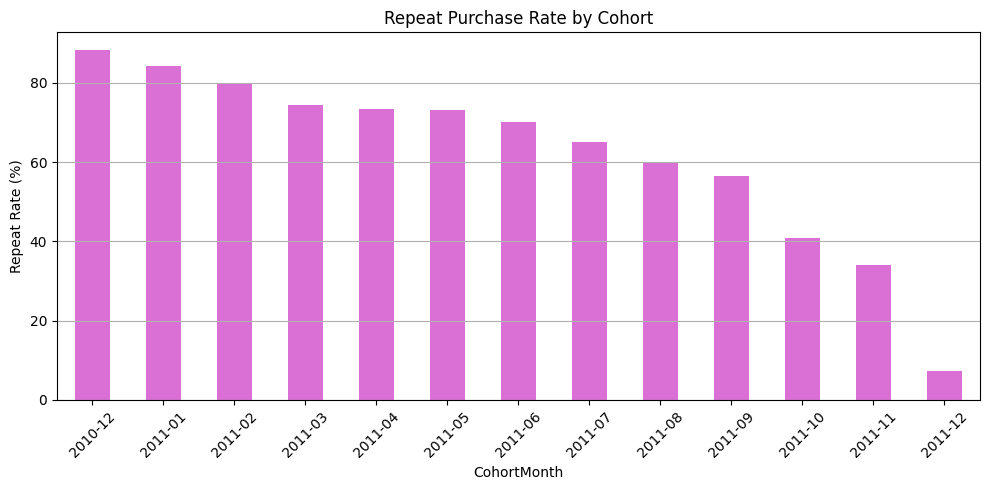

In [22]:
repeat_rate.plot(kind='bar', figsize=(10, 5), color='orchid')
plt.title('Repeat Purchase Rate by Cohort')
plt.ylabel('Repeat Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 🔁 Repeat Purchase Rate by Cohort – Key Insights

- **Strong early retention**: Customers from older cohorts (like **2010-12 to 2011-02**) show **high repeat rates**, around **80–90%**.
- **Declining trend over time**: Newer cohorts (especially **2011-10 to 2011-12**) show **sharp drops** in repeat purchase rates.
- **Possible causes**:
  - Changes in marketing strategies
  - Product/experience quality decline
  - Seasonal or economic shifts
- **Actionable Insight**: Investigate what was working well for earlier cohorts and what changed afterward — look into user experience, onboarding, and campaign differences.

📉 The pattern clearly signals **decreasing customer loyalty** in later cohorts — something to act on.


## CHURN DEFINITION & LOGIC


### Goal:
Determine which customers churned — i.e., stopped buying. We need this as our target variable (0 = Active, 1 = Churned).

### Logic:
We define churn as:
"Customer has not purchased in the last 6 months" from the last invoice date in the dataset.

In [23]:
# Snapshot date is the reference point (latest date in data)
snapshot_date = df['InvoiceDate'].max()

# Set churn cutoff (6 months before snapshot date)
churn_cutoff = snapshot_date - pd.DateOffset(months=6)

# Find last purchase date for each customer
last_purchase_date = df.groupby('CustomerID')['InvoiceDate'].max()

# Define churned customers: no purchases in last 6 months
churn_flag = (last_purchase_date < churn_cutoff).astype(int)

In [24]:
churn_flag

CustomerID
12346.0    1
12347.0    0
12348.0    0
12349.0    0
12350.0    1
          ..
18280.0    1
18281.0    0
18282.0    0
18283.0    0
18287.0    0
Name: InvoiceDate, Length: 4372, dtype: int64

## Feature Engineering

####  Create RFM Features
These are classic customer value metrics:

Recency: Days since last purchase

Frequency: Number of purchases

Monetary: Total money spent

In [25]:
# Reference date is snapshot_date
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']


#### Add Behavioral Features
We enhance RFM with more signals:

In [26]:
# Customer lifetime (in days)
first_purchase = df.groupby('CustomerID')['InvoiceDate'].min()
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max()

rfm['CustomerLifetime'] = (last_purchase - first_purchase).dt.days

# Avg basket size (quantity per invoice)
rfm['AvgBasketSize'] = df.groupby('CustomerID')['Quantity'].mean()

# Total number of transactions
rfm['TotalTransactions'] = df.groupby('CustomerID')['InvoiceNo'].nunique()



In [27]:
# Merge churn label to features
rfm['Churned'] = churn_flag


In [28]:
rfm.head()

,Recency,Frequency,Monetary,CustomerLifetime,AvgBasketSize,TotalTransactions,Churned
CustomerID,,,,,,,
12346.0,325,2,5342.40,0,59.500000,2,1
12347.0,1,7,431501.00,365,46.763736,7,0
12348.0,74,4,82378.47,282,49.645161,4,0
12349.0,18,1,176075.12,0,47.041096,1,0
12350.0,309,1,48173.37,0,53.941176,1,1


## Modelling

#### Data Splitting

In [46]:
from sklearn.model_selection import train_test_split

X = rfm.drop(columns=['Churned'])   # Features
y = rfm['Churned']                  # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#### Model Training

In [32]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Create 'models' directory
models_dir = os.path.join(os.path.dirname(os.getcwd()), 'models')
os.makedirs(models_dir, exist_ok=True)

# Train and save models
rf_clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)

# Save models
joblib.dump(rf_clf, os.path.join(models_dir, 'random_forest_model.pkl'))
joblib.dump(xgb_clf, os.path.join(models_dir, 'xgboost_model.pkl'))

print("Models saved successfully!")



Models saved successfully!


#### Model Evaluation

In [33]:
# Create 'evaluations' directory
eval_dir = os.path.join(os.path.dirname(os.getcwd()), 'evaluations')
os.makedirs(eval_dir, exist_ok=True)

# Define a function to save confusion matrix and classification report
def save_evaluation(model_name, y_true, y_pred):
    # Confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(os.path.join(eval_dir, f'{model_name}_ConfusionMatrix.png'))
    plt.close()

    # Classification report
    report = classification_report(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.text(0.01, 1.0, report, {'fontsize': 10}, fontproperties='monospace')
    plt.axis('off')
    plt.savefig(os.path.join(eval_dir, f'{model_name}_ClassificationReport.png'), bbox_inches='tight')
    plt.close()

    # Also print results
    print(f"{model_name} Results:")
    print(report)
    print(confusion_matrix(y_true, y_pred))
    print('-' * 50)

# Random Forest evaluation
save_evaluation('RandomForest', y_test, rf_clf.predict(X_test))

# XGBoost evaluation
save_evaluation('XGBoost', y_test, xgb_clf.predict(X_test))



RandomForest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       704
           1       1.00      1.00      1.00       171

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875

[[704   0]
 [  0 171]]
--------------------------------------------------
XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       704
           1       1.00      1.00      1.00       171

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875

[[704   0]
 [  0 171]]
--------------------------------------------------


In [37]:
!pip install gradio

  Using cached ffmpy-0.5.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached tomlkit-0.13.2-py3-none-any.whl.metadata (2.7 kB)
   ---------------------------------------- 0.0/54.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/54.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/54.0 MB ? eta -:--:--
    --------------------------------------- 1.0/54.0 MB 3.4 MB/s eta 0:00:16
   - -------------------------------------- 1.8/54.0 MB 3.1 MB/s eta 0:00:17
   - -------------------------------------- 2.6/54.0 MB 3.3 MB/s eta 0:00:16
   -- ------------------------------------- 3.4/54.0 MB 3.4 MB/s eta 0:00:16
   --- ------------------------------------ 4.2/54.0 MB 3.5 MB/s eta 0

In [47]:
import gradio as gr
import joblib
import numpy as np

# Load the trained Random Forest model
rf_clf = joblib.load('../models/random_forest_model.pkl')

# Prediction function for Gradio
def predict(*input_data):
    input_data = np.array(input_data).reshape(1, -1)  # Convert to numpy array and reshape for model
    prediction = rf_clf.predict(input_data)  # Predict churn (0 = active, 1 = churned)
    return "Churned" if prediction[0] == 1 else "Active"

# Gradio interface function
def create_interface():
    # Define input fields based on features (columns in your model input data)
    input_features = [gr.Number(label=col) for col in ['Recency', 'Frequency', 'Monetary', 'CustomerLifetime', 'AvgBasketSize', 'TotalTransactions']]
    output = gr.Label()

    # Create the Gradio interface with live=False to wait for input
    interface = gr.Interface(fn=predict, 
                             inputs=input_features, 
                             outputs=output, 
                             live=False)  # Wait for "Submit"
    interface.launch(share=True)

# Launch the Gradio interface
create_interface()




* Running on local URL:  http://127.0.0.1:7864
* Running on public URL: https://7fe821fab5dcf40bda.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [44]:
rfm

,Recency,Frequency,Monetary,CustomerLifetime,AvgBasketSize,TotalTransactions,Churned
CustomerID,,,,,,,
12346.0,325,2,5342.40,0,59.500000,2,1
12347.0,1,7,431501.00,365,46.763736,7,0
12348.0,74,4,82378.47,282,49.645161,4,0
12349.0,18,1,176075.12,0,47.041096,1,0
12350.0,309,1,48173.37,0,53.941176,1,1
...,...,...,...,...,...,...,...
18280.0,277,1,18907.36,0,49.500000,1,1
18281.0,180,1,26009.01,0,54.142857,1,0
18282.0,7,3,36010.74,118,60.461538,3,0
